# DATA PREPARATION

In [44]:
# libraries to describe de data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer 
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
from PIL import Image
from nltk.probability import FreqDist
import random
import re
import plotly.express as px
import plotly.graph_objects as go


plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
# import extra code that will help us in our process
from other import tools 

In [46]:
# import shape for our word cloud
char_mask = np.array(Image.open('figures/twitter.png'))

# figure size in inches
sns.set(rc={'figure.figsize':(5,16)})

# function to plot th word cloud

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(179, 44%%, %d%%)" % random.randint(30, 70)

def plot_word_cloud(char_mask, word_fre):
  # generating the wordcloud
  wordcloud = WordCloud(background_color='white',
                        mask=char_mask,
                        contour_color="#1C2541",
                        contour_width=3,
                        max_words=2000).generate_from_frequencies(word_fre)
  # plotting the WordCloud
  # plot the word cloud 
  #0C1821
  #1B2A41
  #1C2541
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")

  #to remove axis value
  plt.axis('off')
  plt.show()

In [47]:
df_tweets = pd.read_csv('https://media.githubusercontent.com/media/GDLPLearning/Sentiment-Analysis-for-the-MDP/master/notebooks/Exploratory/data/2019.csv') # read the csv file

## Single example 2019

In [48]:
tweet_text=df_tweets[['tweet_id','full_text']]
sample_text=tweet_text.sample(n=10,random_state=15)
#for text in sample_text:
  #print(text,"\n")
#sample_text
tweet_example=sample_text.loc[16772,'full_text']
tweet_example

' Inteligencia artificial, Internet de las cosas y #blockchain son las tecnologías en las que se va a enfocar el Centro para la #4Revolución de @wef en #Medellín -@AlcaldiadeMed. @MincomercioCo @Ruta_N #EconomíaNaranja (vía @larepublica_co)'

In [49]:
#2
tweet_example=tweet_example.lower()
print("unify the case of the text: convert it to lowercase")
print(tweet_example,"\n")
#3
tweet_example=re.sub(r'@\w+','',tweet_example)
print("remove the @mentions")
print(tweet_example,"\n")
#4
tweet_example=re.sub(r'#\w+','',tweet_example)
print("remove the #hashtags")
print(tweet_example,"\n")
#5
tweet_example=tweet_example.translate(str.maketrans('','',string.punctuation))
print("remove the punctuation")
print(tweet_example,"\n")
#6
replace_accent_dict = tools.replace_accent_dict 
print(f'replace_accent_dict {replace_accent_dict} \n eliminamos los acentos en las palabras \n' )
for accent, new_value in replace_accent_dict.items():
    tweet_example = tweet_example.replace(accent,new_value)
print(tweet_example,"\n")
#7
stop_words = tools.stop_words 
print(f'stop_words {stop_words} \n eliminamos las stop_words \n' )
new_tweet_example = ""
for word in tweet_example.split():
    if word not in stop_words:
        new_tweet_example += word + " "
print(new_tweet_example,"\n")

unify the case of the text: convert it to lowercase
 inteligencia artificial, internet de las cosas y #blockchain son las tecnologías en las que se va a enfocar el centro para la #4revolución de @wef en #medellín -@alcaldiademed. @mincomercioco @ruta_n #economíanaranja (vía @larepublica_co) 

remove the @mentions
 inteligencia artificial, internet de las cosas y #blockchain son las tecnologías en las que se va a enfocar el centro para la #4revolución de  en #medellín -.   #economíanaranja (vía ) 

remove the #hashtags
 inteligencia artificial, internet de las cosas y  son las tecnologías en las que se va a enfocar el centro para la  de  en  -.    (vía ) 

remove the punctuation
 inteligencia artificial internet de las cosas y  son las tecnologías en las que se va a enfocar el centro para la  de  en      vía  

replace_accent_dict {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u'} 
 eliminamos los acentos en las palabras 

 inteligencia artificial internet de las cosas y  son 

## Multiple examples 2019

In [50]:
full_text=df_tweets['full_text']
sample_text=full_text.sample(10,random_state=6)
for text in sample_text:
  print(text,"\n")

 Alerta por supuesto reclutamiento de menores en Tarazá vía @caracolradio 

 Esa culeada que se va a llevar él Unión en Medellín será monumental 

 @marieferro98 En Colombia marcó un momento histórico, dando la primera Libertadores con Nacional de Medellín que era el 80% de la Selección que fue a Italia 90. Después se exageró el toque-toque. Puede aportar. No está muy actualizado 

 A hoy Medellín busca central , no existen conversaciones no por más jugadores en otras posiciones 

 @cielomontoya3 @DavidRacero Su forma de comunicarse nos permite concluir que necesita atención profesional su grado de FANATISMO es altamente tóxico Usted está en un grado similar a Macías y popeye Con solo una X vamos a sacar los bandidos del circo democrático de los cargos públicos Medellín por ejemplo!! 

 70 mil mujeres tienen medidas de protección en Medellín 

 Con este evento se visibiliza las acciones y movilizaciones que los municipios del corredor de la autopista Medellín- Bogotá desarrollan para f

In [51]:
full_text=full_text.str.split()
sample_text=full_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")   

['Por', 'otro', 'lado', 'La', 'Policía', 'hizo', 'allanamientos', 'en', 'Bogotá,', 'Medellín', 'y', 'Cali', 'a', 'viviendas', 'de', 'personas', 'que', 'hacen', 'parte', 'de', 'movimientos', 'que', 'promueven', 'el', '#ParoNacional21Nov', '"En', 'estos', 'allanamientos', 'las', 'autoridades', 'se', 'llevaron', 'pinceles,', 'pinturas', 'y', 'carteles', 'alusivos', 'al', 'paro."'] 

['CASA', 'EN', 'BELÉN', 'LA', 'GLORIA', 'SOBRE', 'LA', 'AVENIDA', '80', 'en', 'Medellín/Antioquia/Colombia', 'en', 'Venta'] 

['@matyakdmia', '@CynDLQ', 'Club', 'Colombia', 'perro.', 'Y', 'el', 'Ron', 'Medellín', 'que', 'tomó', 'hasta', '@Nahuerc'] 

['@kenroVlogs', 'Hermoso', 'corazon', 'saludos', 'desde', 'medellin', 'colombia'] 

['Carechimba,', 'EMPEZÓ', 'A', 'LLOVER', 'JUSTO', 'CUANDO', 'TENGO', 'QUE', 'IR', 'A', 'CLASE,', 'O', 'SEA,', 'NO,', 'MEDELLÍN,', 'ME', 'TENÉS', 'MAMADA', 'MARICA'] 

['@Der0207', '@IamCabezoon', 'Junior', 'le', 'ofreció', 'más', 'q', 'Medellín,', 'lo', 'dijeron', 'en', 'win,', 'pe

In [52]:
full_text=full_text.apply(lambda x: ' '.join(x))
full_text=full_text.str.lower()
sample_text=full_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")  

por otro lado la policía hizo allanamientos en bogotá, medellín y cali a viviendas de personas que hacen parte de movimientos que promueven el #paronacional21nov "en estos allanamientos las autoridades se llevaron pinceles, pinturas y carteles alusivos al paro." 

casa en belén la gloria sobre la avenida 80 en medellín/antioquia/colombia en venta 

@matyakdmia @cyndlq club colombia perro. y el ron medellín que tomó hasta @nahuerc 

@kenrovlogs hermoso corazon saludos desde medellin colombia 

carechimba, empezó a llover justo cuando tengo que ir a clase, o sea, no, medellín, me tenés mamada marica 

@der0207 @iamcabezoon junior le ofreció más q medellín, lo dijeron en win, pero el burro este solo juega en su dim 

el aire más enrarecido, el cielo cada vez más gris y unas congestiones insoportables en las vías. la medida del pico y placa ambiental en #medellín deja mucho que desear hasta que no se tomen soluciones drásticas y de fondo. 

una alcaldía con sexto sentido: ana cristina quie

In [53]:
replace_punctuation_dict = tools.replace_punctuation_dict # dictionary with the punctuation marks to replace
print(f'replace punctuation dict {replace_punctuation_dict} \n') 
for punctuation, new_value in replace_punctuation_dict.items():
    full_text = full_text.str.replace(punctuation,new_value)
sample_text=full_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n") 

replace punctuation dict {'¿': '', '?': '', '!': '', '¡': '', '"': '', '(': '', ')': '', '/': '', '*': '', ',': '', '.': '', '-': '', ':': '', '…': '', '#': '', '@': '', "'": '', '|': '', '“': '', '”': '', '%': '', '&': '', '_': ''} 

por otro lado la policía hizo allanamientos en bogotá medellín y cali a viviendas de personas que hacen parte de movimientos que promueven el paronacional21nov en estos allanamientos las autoridades se llevaron pinceles pinturas y carteles alusivos al paro 

casa en belén la gloria sobre la avenida 80 en medellínantioquiacolombia en venta 

matyakdmia cyndlq club colombia perro y el ron medellín que tomó hasta nahuerc 

kenrovlogs hermoso corazon saludos desde medellin colombia 

carechimba empezó a llover justo cuando tengo que ir a clase o sea no medellín me tenés mamada marica 

der0207 iamcabezoon junior le ofreció más q medellín lo dijeron en win pero el burro este solo juega en su dim 

el aire más enrarecido el cielo cada vez más gris y unas conges

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_4602/1071909723.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  full_text = full_text.str.replace(punctuation,new_value)


In [54]:
replace_accent_dict = tools.replace_accent_dict 
print(f'replace_accent_dict {replace_accent_dict} \n eliminamos los acentos en las palabras \n' )
for accent, new_value in replace_accent_dict.items():
    full_text = full_text.str.replace(accent,new_value)
sample_text=full_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")

replace_accent_dict {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u'} 
 eliminamos los acentos en las palabras 

por otro lado la policia hizo allanamientos en bogota medellin y cali a viviendas de personas que hacen parte de movimientos que promueven el paronacional21nov en estos allanamientos las autoridades se llevaron pinceles pinturas y carteles alusivos al paro 

casa en belen la gloria sobre la avenida 80 en medellinantioquiacolombia en venta 

matyakdmia cyndlq club colombia perro y el ron medellin que tomo hasta nahuerc 

kenrovlogs hermoso corazon saludos desde medellin colombia 

carechimba empezo a llover justo cuando tengo que ir a clase o sea no medellin me tenes mamada marica 

der0207 iamcabezoon junior le ofrecio mas q medellin lo dijeron en win pero el burro este solo juega en su dim 

el aire mas enrarecido el cielo cada vez mas gris y unas congestiones insoportables en las vias la medida del pico y placa ambiental en medellin deja mucho que desear hasta q

In [55]:
full_text_alpha=pd.Series()
for tweet in full_text:
    new_tweet=''
    for word in tweet.split():
        if word.isalpha():
            new_tweet+=word+' '
    full_text_alpha=full_text_alpha.append(pd.Series(new_tweet))
sample_text=full_text_alpha.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_4602/2442941255.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_text_alpha=pd.Series()


por otro lado la policia hizo allanamientos en bogota medellin y cali a viviendas de personas que hacen parte de movimientos que promueven el en estos allanamientos las autoridades se llevaron pinceles pinturas y carteles alusivos al paro  

casa en belen la gloria sobre la avenida en medellinantioquiacolombia en venta  

matyakdmia cyndlq club colombia perro y el ron medellin que tomo hasta nahuerc  

kenrovlogs hermoso corazon saludos desde medellin colombia  

carechimba empezo a llover justo cuando tengo que ir a clase o sea no medellin me tenes mamada marica  

iamcabezoon junior le ofrecio mas q medellin lo dijeron en win pero el burro este solo juega en su dim  

el aire mas enrarecido el cielo cada vez mas gris y unas congestiones insoportables en las vias la medida del pico y placa ambiental en medellin deja mucho que desear hasta que no se tomen soluciones drasticas y de fondo  

una alcaldia con sexto sentido ana cristina quiere ser la primera mujer alcaldesa de medellin por

In [56]:
full_text=full_text_alpha

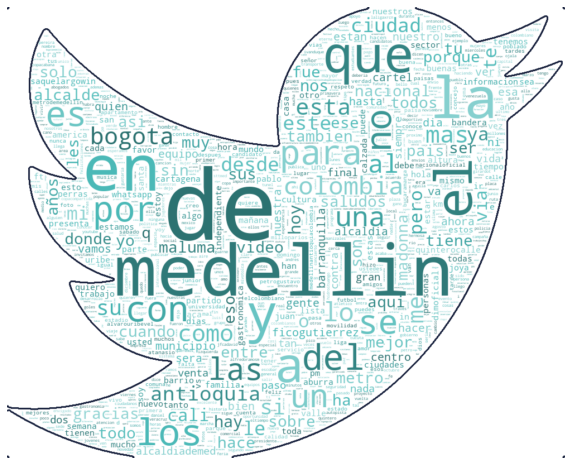

In [57]:
full_tweet_cloud=[]
for tweet in full_text:
    for words in tweet.split():
        full_tweet_cloud.append(words)
word_fre = FreqDist(full_tweet_cloud)
plot_word_cloud(char_mask, word_fre)

In [58]:
word_fre.most_common(30)  # Get 30 most common words

[('de', 20157),
 ('medellin', 16777),
 ('en', 13931),
 ('la', 10739),
 ('y', 8942),
 ('el', 8557),
 ('que', 8285),
 ('a', 7662),
 ('los', 3797),
 ('no', 3600),
 ('con', 3443),
 ('por', 3409),
 ('del', 3371),
 ('para', 3245),
 ('es', 3208),
 ('se', 2989),
 ('un', 2691),
 ('las', 2521),
 ('una', 2033),
 ('lo', 1765),
 ('al', 1716),
 ('colombia', 1622),
 ('mas', 1512),
 ('como', 1464),
 ('bogota', 1453),
 ('esta', 1413),
 ('me', 1389),
 ('si', 1229),
 ('su', 1183),
 ('antioquia', 1078)]

As the most repeated words are words that do not represent anything relevant to our analysis, they will be included in the stop words and we will filter them so that they are not included in the word cloud and thus arrive at a more meaningful result.
This process will be carried out until we eliminate all the stop words and the word cloud shows us something more significant.

In [59]:
stop_words = tools.stop_words 
print(f'stop_words {stop_words} \n eliminamos las stop_words \n' )

stop_words ['de', 'la', 'en', 'y', 'el', 'que', 'a', 'medellin', 'los', 'con', 'no', 'por', 'es', 'para', 'del', 'se', 'un', 'las', 'una', 'lo', 'su', 'mas', 'esta', 'como', 'si', 'le', 'este', 'al', 'me', 'mi', 'pero', 'o', 'sus', 'hay', 'son', 'nos', 'ya', 'te', 'tiene', 'hoy', 'todo', 'sin', 'tu', 'ha', 'q', 'fue', 'eso', 'todos', 'muy', 'años', 'ser', 'porque', 'asi', 'cuando', 'solo', 'desde', 'hace', 'les', 'ni', 'yo', 'hacer', 'estan', 'donde', 'dia', 'ese', 'entre', 'hasta', 'toda', 'esa', 'e', 'va', 'han', 'aqui', 'parte', 'esto', 'tan', 'ahora', 'uno', 'bien', 'cada', 'quien', 'tienen', 'mucho', 'gran', 'tambien', 'estamos', 'usted', 'puede', 'sera', 'dos', 'ver', 'nuestro', 'siempre', 'estos', 'contra', 'nada', 'dias', 'era', 'tener', 'debe', 'a', 'traves', 'sobre', 'sea', 'vez', 'cali', 'menos', 'muchos', 'sido', 'tenemos', 'san', 'año', 'durante', 'ejemplo', 'medio', 'soy', 'buen', 'señor', 'cuenta', 'hola', 'aca', 'van', 'estas', 'algo', 'mismo', 'da', 'nunca', 'todas', '

In [60]:
full_text_stop=pd.Series()
for tweet in full_text:
    new_tweet=''
    for word in tweet.split():
        if word in stop_words:
            new_tweet+=word+' '
    full_text_stop=full_text_stop.append(pd.Series(new_tweet))
sample_text=full_text_stop.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_4602/2549157964.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_text_stop=pd.Series()


por la hizo en bogota medellin y cali a de que parte de que el en estos las se y al  

en la sobre la en en  

colombia y el medellin que hasta  

desde medellin colombia  

a cuando que ir a o sea no medellin me  

le mas q medellin lo en pero el este solo en su  

el mas el cada vez mas y en las la del y en medellin mucho que hasta que no se y de  

una con ser la de medellin por  

si es una para medellin en medio del de la y la  

dos el mismo dia con en el en un de de colombia el uno sin se a la y es de medellin el se y en la de la  



In [61]:
full_text_nonstop=pd.Series()
for tweet in full_text:
    new_tweet=''
    for word in tweet.split():
        if word not in stop_words:
            new_tweet+=word+' '
    full_text_nonstop=full_text_nonstop.append(pd.Series(new_tweet))
sample_text=full_text_nonstop.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_4602/364974547.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_text_nonstop=pd.Series()


otro lado policia allanamientos viviendas personas hacen movimientos promueven allanamientos autoridades llevaron pinceles pinturas carteles alusivos paro  

casa belen gloria avenida medellinantioquiacolombia venta  

matyakdmia cyndlq club perro ron tomo nahuerc  

kenrovlogs hermoso corazon saludos  

carechimba empezo llover justo tengo clase tenes mamada marica  

iamcabezoon junior ofrecio dijeron win burro juega dim  

aire enrarecido cielo gris unas congestiones insoportables vias medida pico placa ambiental deja desear tomen soluciones drasticas fondo  

alcaldia sexto sentido ana cristina quiere primera mujer alcaldesa voto popular  

hermancadena quinterocalle quinterocalle voz esperanzadora aterrador ruido corrupcion guerra  

luisernestogl kikearcinieg lideres arrancaron sendos discursos planetario momento verdad ninguna tibieza enfrento ultraderecha alcalde otro acobardo termino comodidad tibia mermelada verde  



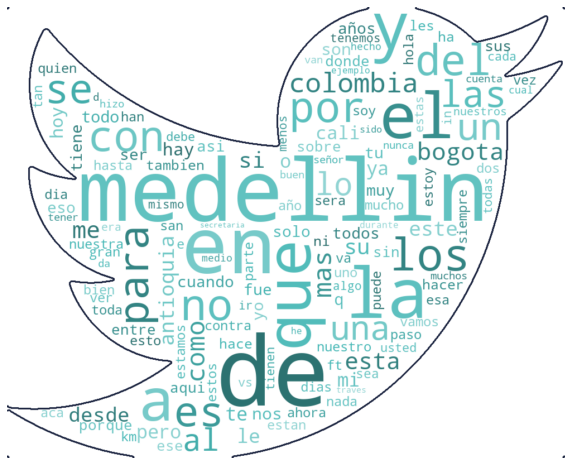

In [62]:
full_text_stop_cloud=[]
for tweet in full_text_stop:
    for words in tweet.split():
        full_text_stop_cloud.append(words)
word_fre = FreqDist(full_text_stop_cloud)
plot_word_cloud(char_mask, word_fre)

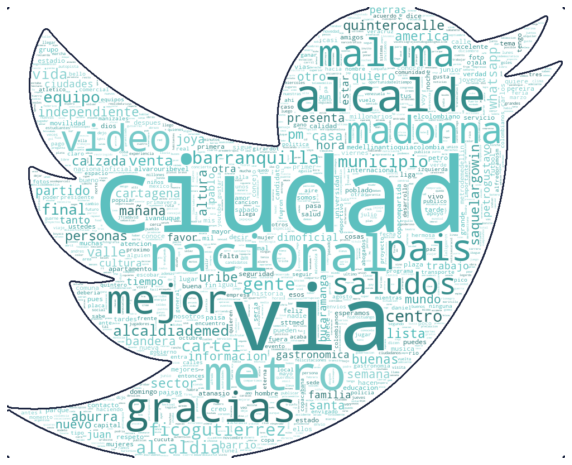

In [63]:
full_text_nonstop_cloud=[]
for tweet in full_text_nonstop:
    for words in tweet.split():
        full_text_nonstop_cloud.append(words)
word_fre = FreqDist(full_text_nonstop_cloud)
plot_word_cloud(char_mask, word_fre)

In [64]:
dict_to_df = {'word':[],'frequency':[]}
for key, value in word_fre.items():
  dict_to_df['word'].append(key)
  dict_to_df['frequency'].append(value)

# create a Df with th efrequency of each word
df = pd.DataFrame.from_dict(dict_to_df)
df.sort_values(by='frequency',ascending=False,inplace=True)
#df[df['frequency'] > 50].sort_values(by='frequency', ascending=False).head(50)

In [65]:
df.head(50)

,word,frequency
300,ciudad,1005
276,via,751
759,nacional,549
1623,metro,484
161,alcalde,449
149,gracias,431
610,mejor,425
4283,maluma,362
12454,madonna,357
121,video,349


In [66]:
df.count()

word         36333
frequency    36333
dtype: int64

In [67]:
keyword=['metro','cultura','vida','jovenes','empresa','trabajo','movilidad','seguridad','tecnologia']
df_keyword=df[df['word'].isin(keyword)].sort_values(by='frequency',ascending=False)
df_keyword

,word,frequency
1623,metro,484
93,vida,246
88,trabajo,164
189,cultura,161
2279,movilidad,146
4877,seguridad,110
2434,jovenes,106
3822,empresa,96
5680,tecnologia,45


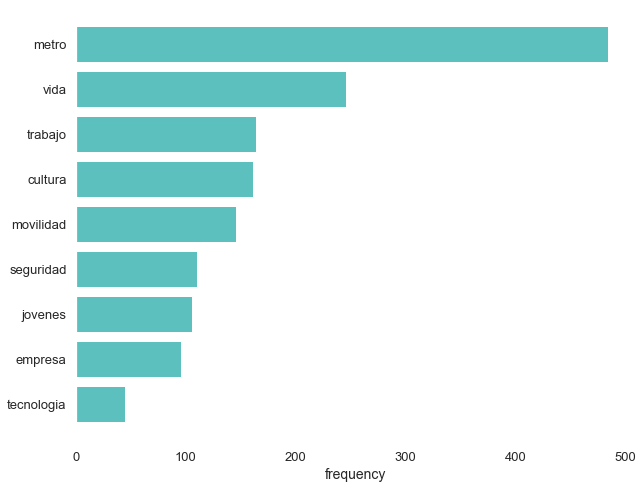

In [68]:
df_keyword=df_keyword.sort_values(by='frequency',ascending=True)
fig, ax = plt.subplots(figsize = (10,8))
plt.barh(df_keyword.word, df_keyword.frequency,color="#5BC0BE") # plots the number of tweets with each location

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
plt.xlabel("frequency",size=14)
#plt.title("")
plt.show()

## MDP

In [69]:
with open('data/PDM/PDM2020-2023.txt') as f:
    lines = f.readlines()

In [70]:
# import shape for our word cloud
char_mask = np.array(Image.open('figures/circulo.png'))

# figure size in inches
sns.set(rc={'figure.figsize':(5,16)})

# function to plot th word cloud

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(179, 44%%, %d%%)" % random.randint(30, 70)

def plot_word_cloud(char_mask, word_fre):
  # generating the wordcloud
  wordcloud = WordCloud(background_color='white',
                        mask=char_mask,
                        #contour_color="#1C2541",
                        #contour_width=3,
                        max_words=100).generate_from_frequencies(word_fre)
  # plotting the WordCloud
  # plot the word cloud 
  #0C1821
  #1B2A41
  #1C2541
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")

  #to remove axis value
  plt.axis('off')
  plt.show()

In [71]:
# create a list with all the words

def texto_to_list(lines):
  full_text = []
  for sentence in lines:
    words = sentence.split()

    # remove punctuation marks
    for w in words:
      wl = w.lower() # word in lower case
      # replace some punctuations mark to keep only words
      for punctuation, new_value in replace_punctuation_dict.items():
        wl = wl.replace(punctuation,new_value)
      
      if wl.isalpha(): # skip if the word contains punctuation mark 

        # replace accent mark 
        for accent, new_value in replace_accent_dict.items():
          wl = wl.replace(accent,new_value)

        if wl not in stop_words: # filtering by stop words
          if len(wl) > 2:
            full_text.append(wl)
  return full_text

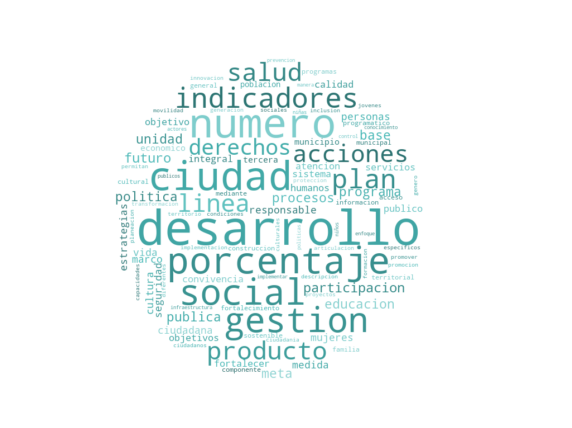

In [72]:
full_text = texto_to_list(lines)
mdp_freq = FreqDist(full_text)
plot_word_cloud(char_mask, mdp_freq)

Text(0.5, 0, 'frequency')

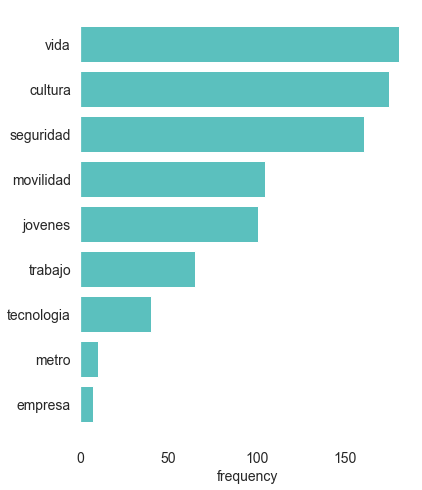

In [73]:
dict_to_df = {'word':[],'frequency':[]}
for key, value in mdp_freq.items():
    dict_to_df['word'].append(key)
    dict_to_df['frequency'].append(value)
df = pd.DataFrame.from_dict(dict_to_df)
keyword=['metro','cultura','vida','jovenes','empresa','trabajo','movilidad','seguridad','tecnologia']
df=df[df['word'].isin(keyword)].sort_values(by='frequency',ascending=False)
df=df.sort_values(by='frequency',ascending=True)
fig, ax = plt.subplots(figsize = (6,8))
plt.barh(df.word, df.frequency,color="#5BC0BE") # plots the number of tweets with each location
# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.tick_params(labelsize=14)
plt.xlabel("frequency",size=14)

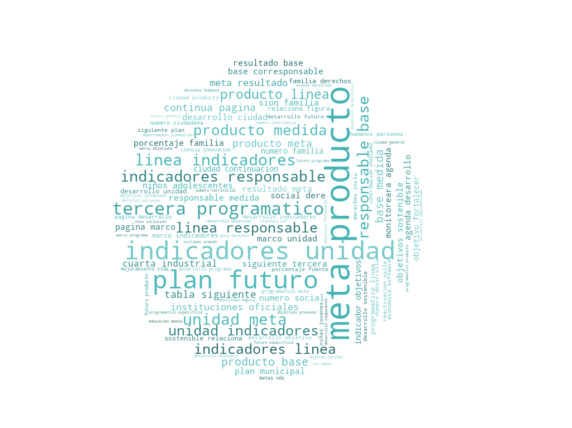

In [74]:
bigrama_list = []
for word_index in range(len(full_text)):
  try:
    bigrama = f'{full_text[word_index]} {full_text[word_index+2]}'
    bigrama_list.append(bigrama)
  except:
    pass

# word cloud for bigramas
bigrama_freq = FreqDist(bigrama_list)
plot_word_cloud(char_mask, bigrama_freq)

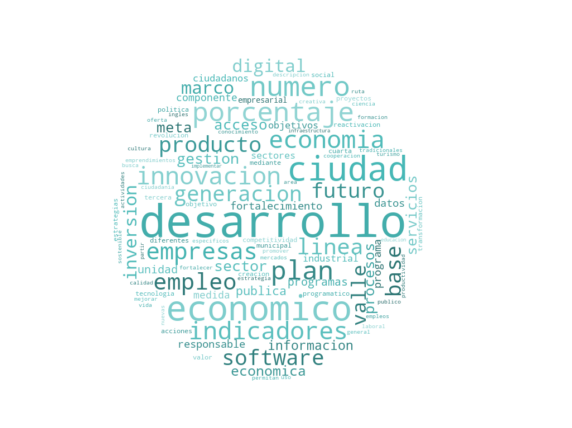

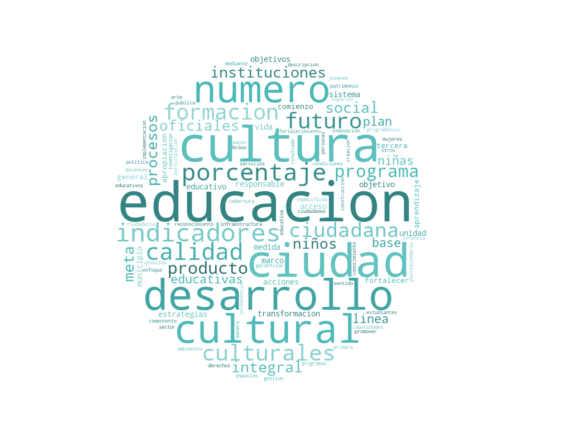

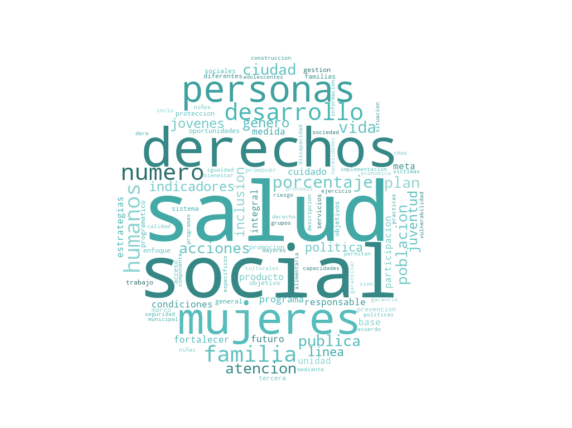

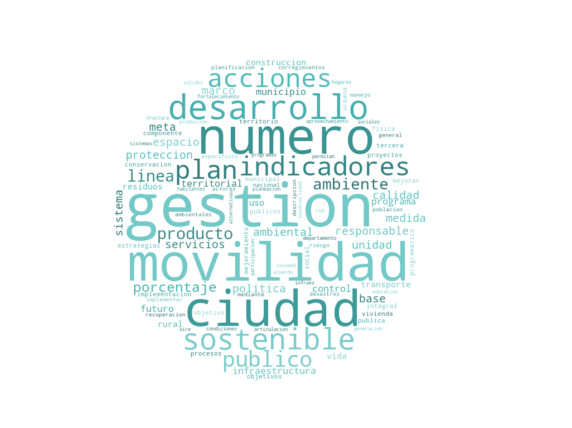

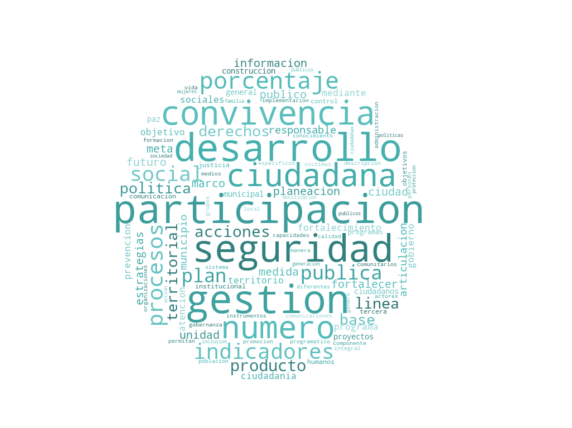

In [75]:
number_list = [1,2,3,4,5]
# figure size in inches
sns.set(rc={'figure.figsize':(17,15)})
i = 0

for number in number_list:
  # leyendo el archivo de texto
  file_name = f'Linea_estrategica_{number}'
  file_path = f'data/PDM/{file_name}.txt'
  with open(file_path) as f:
    lines = f.readlines()

  full_text = texto_to_list(lines)
  mdp_freq = FreqDist(full_text)
  plot_word_cloud(char_mask, mdp_freq)
  # plt.figure(figsize=(10,10))

  # define cuantas nubes van por fila

  
plt.show()

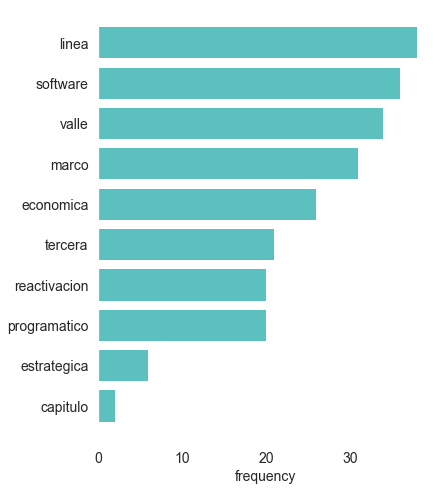

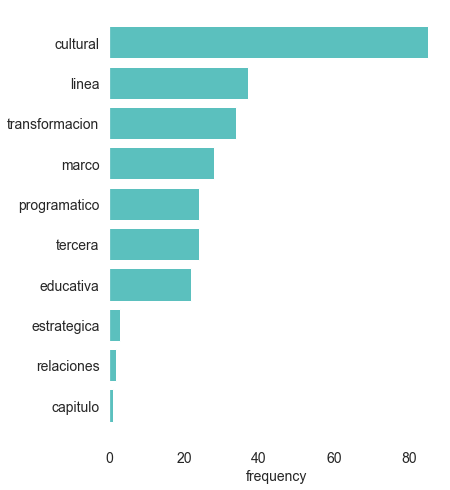

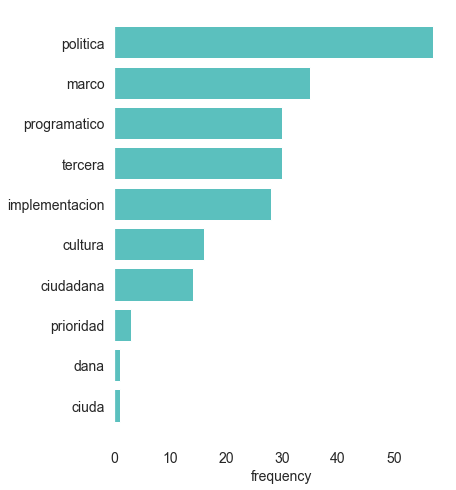

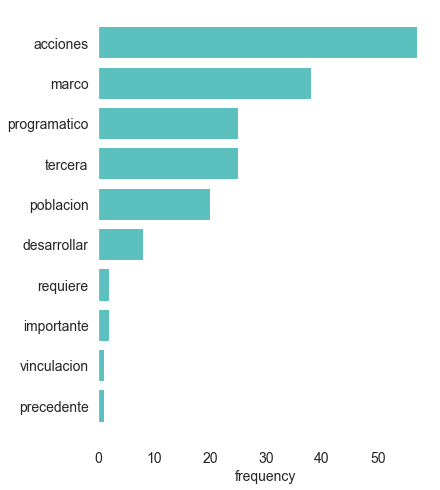

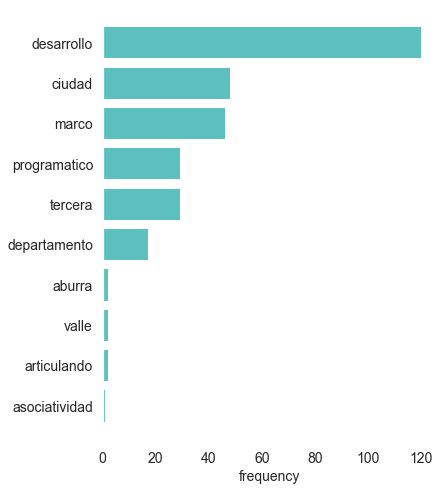

In [76]:
number_list = [1,2,3,4,5]
# figure size in inches
sns.set(rc={'figure.figsize':(17,15)})
i = 0

for number in number_list:
    file_name = f'Linea_estrategica_{number}'
    file_path = f'data/PDM/{file_name}.txt'
    with open(file_path) as f:
        lines = f.readlines()

    full_text = texto_to_list(lines)
    mdp_freq = FreqDist(full_text)

    dict_to_df = {'word':[],'frequency':[]}
    for key, value in mdp_freq.items():
        dict_to_df['word'].append(key)
        dict_to_df['frequency'].append(value)
    df = pd.DataFrame.from_dict(dict_to_df)
    df=df.head(10).sort_values(by='frequency',ascending=False).head(10).sort_values(by='frequency',ascending=True)



    fig, ax = plt.subplots(figsize = (6,8))
    plt.barh(df.word, df.frequency,color="#5BC0BE") # plots the number of tweets with each location
    # Later in the code
    ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.tick_params(labelsize=14)
    plt.xlabel("frequency",size=14)

  
plt.show()

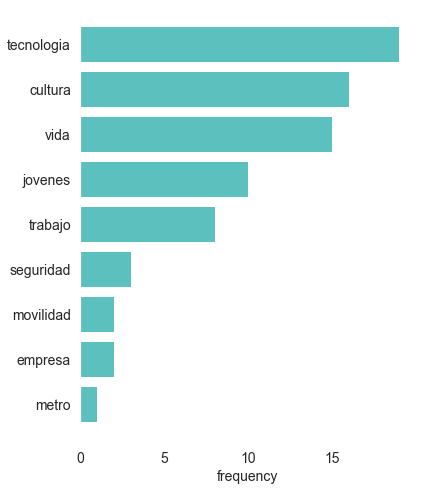

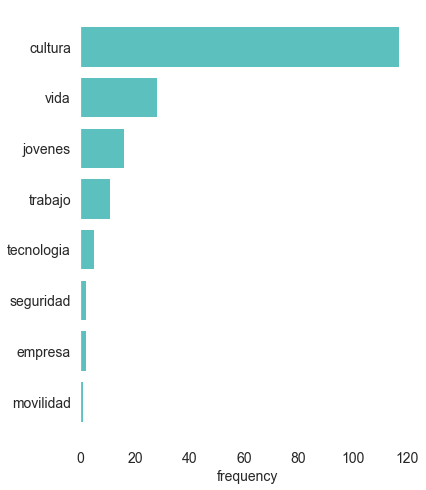

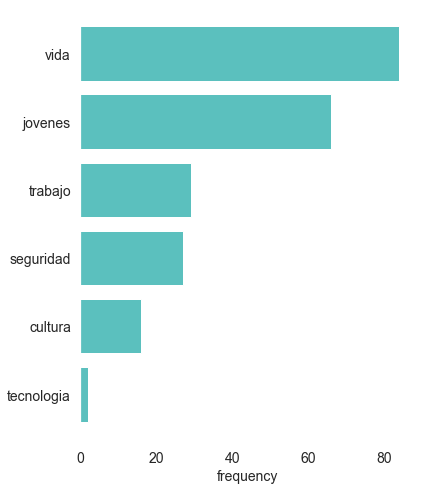

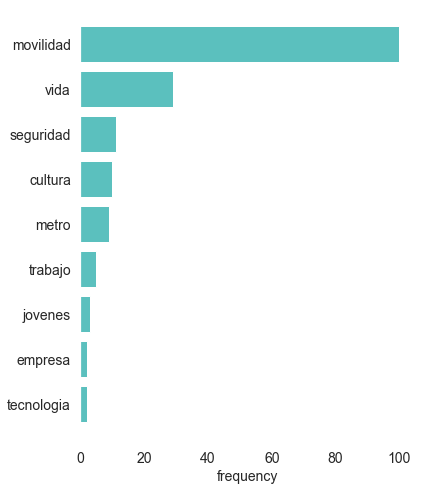

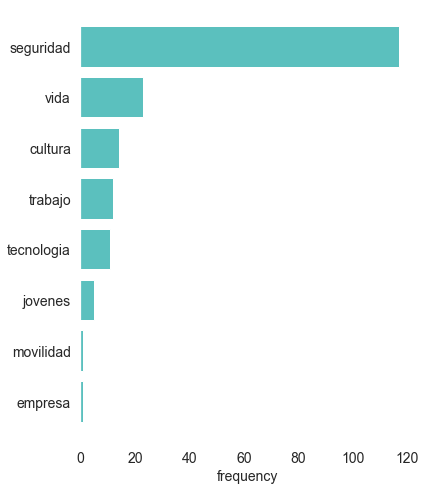

In [77]:
number_list = [1,2,3,4,5]
# figure size in inches
sns.set(rc={'figure.figsize':(17,15)})
i = 0

for number in number_list:
    file_name = f'Linea_estrategica_{number}'
    file_path = f'data/PDM/{file_name}.txt'
    with open(file_path) as f:
        lines = f.readlines()

    full_text = texto_to_list(lines)
    mdp_freq = FreqDist(full_text)

    dict_to_df = {'word':[],'frequency':[]}
    for key, value in mdp_freq.items():
        dict_to_df['word'].append(key)
        dict_to_df['frequency'].append(value)
    df = pd.DataFrame.from_dict(dict_to_df)
    keyword=['metro','cultura','vida','jovenes','empresa','trabajo','movilidad','seguridad','tecnologia']
    df=df[df['word'].isin(keyword)].sort_values(by='frequency',ascending=False)
    df=df.sort_values(by='frequency',ascending=True)
    fig, ax = plt.subplots(figsize = (6,8))
    plt.barh(df.word, df.frequency,color="#5BC0BE") # plots the number of tweets with each location
    # Later in the code
    ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.tick_params(labelsize=14)
    plt.xlabel("frequency",size=14)

  
plt.show()

In [78]:
number_list = [1,2,3,4,5]
# figure size in inches
sns.set(rc={'figure.figsize':(17,15)})
i = 0
data=pd.DataFrame()
for number in number_list:
    file_name = f'Linea_estrategica_{number}'
    file_path = f'data/PDM/{file_name}.txt'
    with open(file_path) as f:
        lines = f.readlines()

    full_text = texto_to_list(lines)
    mdp_freq = FreqDist(full_text)

    dict_to_df = {'word':[],'frequency':[]}
    for key, value in mdp_freq.items():
        dict_to_df['word'].append(key)
        dict_to_df['frequency'].append(value)
    df = pd.DataFrame.from_dict(dict_to_df)
    keyword=['metro','cultura','vida','jovenes','empresa','trabajo','movilidad','seguridad','tecnologia']
    df=df[df['word'].isin(keyword)].sort_values(by='frequency',ascending=False)
    df=df.sort_values(by='frequency',ascending=True)
    df['strategy']="Strategy "+str(number)
    data=data.append(df)



In [79]:
data

,word,frequency,strategy
1767,metro,1,Strategy 1
853,empresa,2,Strategy 1
1387,movilidad,2,Strategy 1
1137,seguridad,3,Strategy 1
331,trabajo,8,Strategy 1
321,jovenes,10,Strategy 1
445,vida,15,Strategy 1
174,cultura,16,Strategy 1
43,tecnologia,19,Strategy 1
2161,movilidad,1,Strategy 2


## Tweets 2019 - 2022

In [80]:
df_tweets=pd.read_csv('https://raw.githubusercontent.com/GDLPLearning/Sentiment-Analysis-for-the-MDP/master/notebooks/Exploratory/data/tweets_interim.csv')

In [81]:
# clean the tweet and save it on a new column

def clean_tweet(tweet):

  new_tweet = ''
  words = tweet.split()
  for w in words:
    wl = w.lower() # word in lower case
    
    # replace numbers
    for number, new_value in tools.replace_numbers_dict.items():
      wl = str(wl).replace(number,new_value)

    # replace some punctuations mark to keep only words
    for punctuation, new_value in tools.replace_punctuation_dict.items():
      wl = wl.replace(punctuation,new_value)
    
    # replace accent mark 
    for accent, new_value in tools.replace_accent_dict.items():
      wl = wl.replace(accent,new_value)

    if wl not in tools.model_stop_wprds:
      new_tweet += f'{wl} '
  
  return new_tweet[:-1]

In [82]:
df_tweets['clean_text'] = df_tweets['full_text'].apply(clean_tweet)

In [83]:
df_tweets.head()

,full_text,key_word,hour,day_of_week,month,year,clean_text
0,Me acordé que a los colombianos de mi ex trab...,trabajo,22,4,1,2020,acorde colombianos ex trabajo gustaba medellin...
1,@JoseFBarriosG @VLADDO @Uber Como van a apoya...,trabajo,22,4,1,2020,josefbarriosg vladdo uber apoyar uber disminuy...
2,En Tierragro sabemos que la labor en el campo...,trabajo,19,4,1,2020,tierragro sabemos labor campo implica tener bu...
3,@seguridadmed PARA NADIE ES UN SECRETO GENERA...,trabajo,19,4,1,2020,seguridadmed nadie secreto general mas facil c...
4,@kmilohurtado_81 @SaqueLargoWin Tengo casi un...,trabajo,18,4,1,2020,kmilohurtado saquelargowin tengo casi decena a...


In [84]:
df_tweets.to_csv('data/tweets_final.csv',index=False)